In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
# Data Generation
n = 100
y_stationary = np.random.normal(0, 1, n)
y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})
df.head()

,Stationary,Nonstationary
0,-1.266724,0.305998
1,-0.508383,0.074314
2,-1.410754,0.601931
3,0.581601,0.495088
4,3.250716,0.419977


<AxesSubplot:>

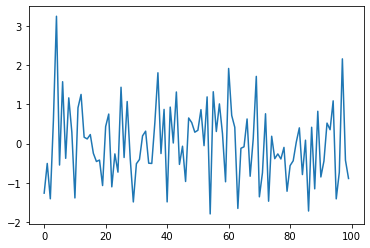

In [3]:
df.Stationary.plot()

<AxesSubplot:>

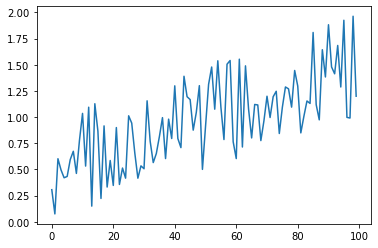

In [4]:
df.Nonstationary.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
# p-value <= .05 means it is stationary
# Aternatively, compare ADF statistic to critical values. ADF statistic <= critical value
# means it is stationary at that level of significance. 

from statsmodels.tsa.stattools import adfuller

results = adfuller(df.Stationary)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.000495
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [6]:
# p-value > .05 means it is non-stationary
# Aternatively, compare ADF statistic to critical values. ADF statistic > critical value
# means it is non-stationary at that level of significance. 

results = adfuller(df.Nonstationary)

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.582545
p-value: 0.492355
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [7]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()
df.head()

,Stationary,Nonstationary,Returns
1,-0.508383,0.074314,-0.757143
2,-1.410754,0.601931,7.099835
3,0.581601,0.495088,-0.177501
4,3.250716,0.419977,-0.151712
5,-0.548944,0.432458,0.029717


<AxesSubplot:>

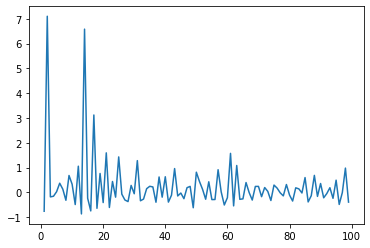

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()
df.head()

,Stationary,Nonstationary,Returns,Diff
2,-1.410754,0.601931,7.099835,0.527617
3,0.581601,0.495088,-0.177501,-0.106843
4,3.250716,0.419977,-0.151712,-0.075111
5,-0.548944,0.432458,0.029717,0.012480
6,1.578830,0.593653,0.372744,0.161196


<AxesSubplot:>

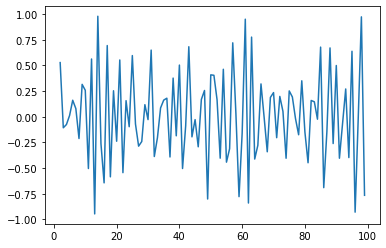

In [12]:
# Plot the 
df.Diff.plot()

In [13]:
# Reevaluate the time series data using the one of the converted columns 
results = adfuller(df.Diff)

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.682100
p-value: 0.000000
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
